In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [153]:
train = pd.read_csv("./house-prices-advanced-regression-techniques/train.csv")
train_df = pd.DataFrame(train)

In [154]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [155]:
data_df = pd.DataFrame(train[['LotArea', 'Fireplaces', 'LotFrontage', 'OverallQual', 'OverallCond', 'EnclosedPorch', '2ndFlrSF', 'YrSold', 'SalePrice']])

In [156]:
data_df

,LotArea,Fireplaces,LotFrontage,OverallQual,OverallCond,EnclosedPorch,2ndFlrSF,YrSold,SalePrice
0,8450,0,65.0,7,5,0,854,2008,208500
1,9600,1,80.0,6,8,0,0,2007,181500
2,11250,1,68.0,7,5,0,866,2008,223500
3,9550,1,60.0,7,5,272,756,2006,140000
4,14260,1,84.0,8,5,0,1053,2008,250000
...,...,...,...,...,...,...,...,...,...
1455,7917,1,62.0,6,5,0,694,2007,175000
1456,13175,2,85.0,6,6,0,0,2010,210000
1457,9042,2,66.0,7,9,0,1152,2010,266500
1458,9717,0,68.0,5,6,112,0,2010,142125


In [157]:
data_df.isnull().sum()

LotArea            0
Fireplaces         0
LotFrontage      259
OverallQual        0
OverallCond        0
EnclosedPorch      0
2ndFlrSF           0
YrSold             0
SalePrice          0
dtype: int64

In [158]:
data_df = data_df.dropna(axis = 0)

In [159]:
data_df.isnull().sum()

LotArea          0
Fireplaces       0
LotFrontage      0
OverallQual      0
OverallCond      0
EnclosedPorch    0
2ndFlrSF         0
YrSold           0
SalePrice        0
dtype: int64

<AxesSubplot:>

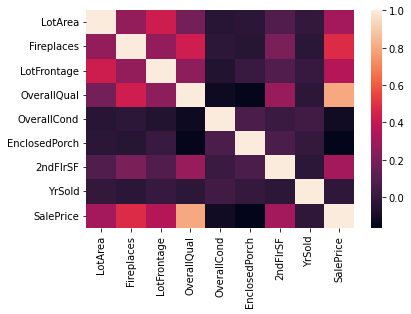

In [160]:
corr_data = data_df.corr()
sns.heatmap(corr_data)

In [161]:
targets = pd.DataFrame(data_df['SalePrice'])
targets

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [162]:
features = pd.DataFrame(data_df)
features

,LotArea,Fireplaces,LotFrontage,OverallQual,OverallCond,EnclosedPorch,2ndFlrSF,YrSold,SalePrice
0,8450,0,65.0,7,5,0,854,2008,208500
1,9600,1,80.0,6,8,0,0,2007,181500
2,11250,1,68.0,7,5,0,866,2008,223500
3,9550,1,60.0,7,5,272,756,2006,140000
4,14260,1,84.0,8,5,0,1053,2008,250000
...,...,...,...,...,...,...,...,...,...
1455,7917,1,62.0,6,5,0,694,2007,175000
1456,13175,2,85.0,6,6,0,0,2010,210000
1457,9042,2,66.0,7,9,0,1152,2010,266500
1458,9717,0,68.0,5,6,112,0,2010,142125


In [163]:
from sklearn.model_selection import train_test_split


In [164]:
X_train, X_test, y_train, y_test = train_test_split(features, targets)
X_train.shape, X_test.shape

((900, 9), (301, 9))

In [165]:
1095 + 365

1460

In [166]:
from sklearn.linear_model import LinearRegression

In [167]:
lr = LinearRegression().fit(X_train, y_train)
lr.fit(X_train, y_train)

LinearRegression()